In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import warnings
warnings.simplefilter("ignore")

In [ ]:
# Satisfaction 0-4: extreme unsatisfy, unsatisfy, neutral, satisfy, extreme satisfy
# trains = pd.read_csv("AustraliaTrain.csv")
# Satisfaction 0-2: unsatisfy, neutral, satisfy
# trains = pd.read_csv("AustraliaTrain_pp.csv")
# Satisfaction 0-1: unsatisfy, satisfy
trains = pd.read_csv("AustraliaTrain_pp2.csv")
trains.dropna(axis=0)
X = trains[
    [
#     Full features:
#        "Sydney","Melbourn","Brisbane","Perth", "female","less31","above60","lowinc","highinc","edubach","edugrad","license","owner","reqcar",
#        "adultkid","multiple","Ampeak","Pmpeak","shopping","social","info","busto","driveto","cycleto","dropedto",
#        "crowded","overcrow","activity","walkfrom","bikefrom","pickedfr","parttime","selfemp","outwork","peakfare","students","seniorco","costdol","intrmins","wtmins",
#        "acctmins","ttmins","unknown","railsig","railmodr","costneg","wtneg"

#     Good feature selection based on filter, wrapper and PCA feature selection evaluation:
          "peakfare","adultkid","seniorco","less31","intrmins","costdol","costneg","wtneg","wtmins"
    ]
]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Subset input and output features
y = trains[["prSat"]]

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1234
)

In [ ]:
mlpModel = MLPClassifier(activation='softmax', random_state=123)

In [4]:
# Define a set of cross-validation folds
kf = KFold(n_splits=10, random_state=19, shuffle=True)
# Fit MLP with 10-fold cross-validation to the training data
mlpResults = cross_validate(mlpModel, X_train, np.ravel(y_train), cv=kf)

mlpScores = mlpResults["test_score"]

# View accuracy for each fold
print("mlp cross validation cores:", mlpScores.round(3))

# Calculate descriptive statistics
print("Mean:", mlpScores.mean().round(3))
print("SD:", mlpScores.std().round(3))

NameError: name 'X_train' is not defined

In [ ]:
mlpModel.fit(X_train, y_train)
mlpModel.score(X_test, y_test)

0.8100113765642776

In [ ]:
svcModel = SVC(kernel='linear', random_state=123)

In [ ]:
# Fit SVC with 10-fold cross-validation to the training data
svcResults = cross_validate(svcModel, X_train, np.ravel(y_train), cv=kf)
svcScores = svcResults["test_score"]

# View accuracy for each fold
print("svc cross validation scores:", svcScores.round(3))

# Calculate descriptive statistics
print("Mean:", svcScores.mean().round(3))
print("SD:", svcScores.std().round(3))

svc cross validation cores: [0.82  0.776 0.756 0.78  0.776 0.805 0.79  0.824 0.77  0.799]
Mean: 0.79
SD: 0.021


In [ ]:
svcModel.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
svcModel.score(X_test, y_test)

0.8111490329920364

In [ ]:
rfModel = RandomForestClassifier(n_estimators=100, random_state=1234)

In [ ]:
# Fit Randorm Forest with 10-fold cross-validation to the training data
rfResults = cross_validate(rfModel, X_train, np.ravel(y_train), cv=kf)
rfScores = rfResults["test_score"]

# View accuracy for each fold
print("Random forest cross validation scores:", rfScores.round(3))

# Calculate descriptive statistics
print("Mean:", rfScores.mean().round(3))
print("SD:", rfScores.std().round(3))

Random forest cross validation cores: [0.8   0.727 0.741 0.722 0.771 0.776 0.766 0.771 0.711 0.74 ]
Mean: 0.752
SD: 0.027


In [ ]:
rfModel.fit(X_train, y_train)
rfModel.score(X_test, y_test)

0.7656427758816837

In [ ]:
# Combine scores from three models into a dataframe
df = pd.DataFrame({"mlp": mlpScores, "svc": svcScores, "random forest":rfScores})

Text(0, 0.5, 'Cross-validation scores')

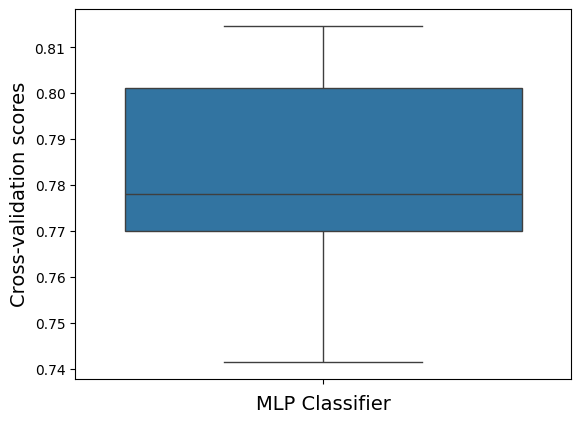

In [ ]:
# Boxplot of errors for k-nearest neighbors
p = sns.boxplot(data=df, y="mlp")
p.set_xlabel("MLP Classifier", fontsize=14)
p.set_ylabel("Cross-validation scores", fontsize=14)

Text(0, 0.5, 'Cross-validation scores')

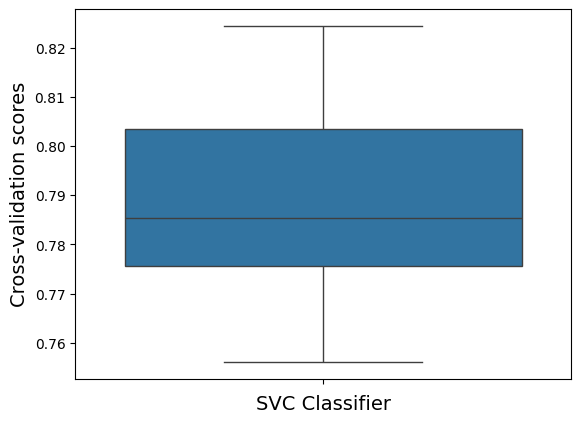

In [ ]:
# Boxplot of errors for k-nearest neighbors
p = sns.boxplot(data=df, y="svc")
p.set_xlabel("SVC Classifier", fontsize=14)
p.set_ylabel("Cross-validation scores", fontsize=14)

Text(0, 0.5, 'Cross-validation scores')

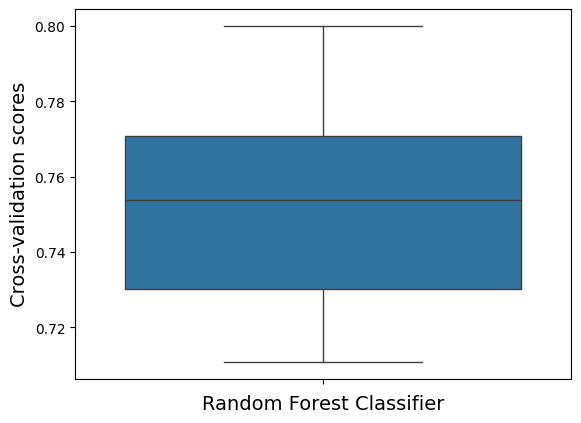

In [ ]:
# Boxplot of errors for k-nearest neighbors
p = sns.boxplot(data=df, y="random forest")
p.set_xlabel("Random Forest Classifier", fontsize=14)
p.set_ylabel("Cross-validation scores", fontsize=14)